# Movie Recomendation Project

Providing a basic recommendation system by suggesting movies that are most similar to a particular movie. 
To describe it more accurately,it just tells you what movies are most similar to your movie choice.


## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
colmmns = ['user_id', 'item_id', 'rating', 'timestamp']

In [3]:
df = pd.read_csv('u.data', sep='\t', names=colmmns )

In [35]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


## Data and Data Info

In [5]:
titles = pd.read_csv('Movie_Id_Titles')

In [6]:
titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [7]:
df = pd.merge(df, titles, on='item_id')

In [8]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [9]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [10]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [11]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [12]:
ratings['num of ratings'] = df.groupby('title')['rating'].count()

In [13]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


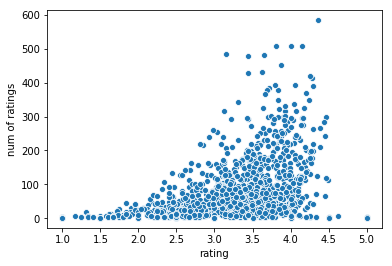

In [14]:
sns.scatterplot(x='rating', y='num of ratings', data=ratings)

c:\users\hp\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


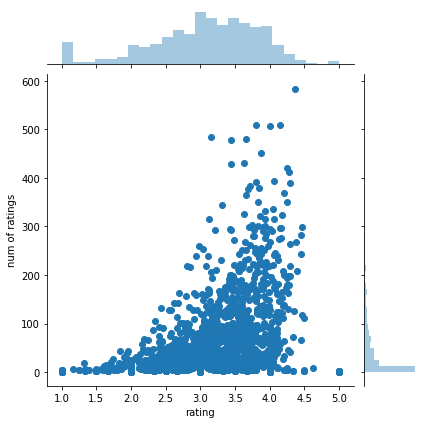

In [36]:
sns.jointplot(x='rating', y='num of ratings', data=ratings)

## Movie rating tends to be better with higher number of ratings

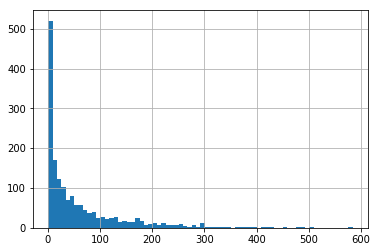

In [16]:
ratings['num of ratings'].hist(bins=70)

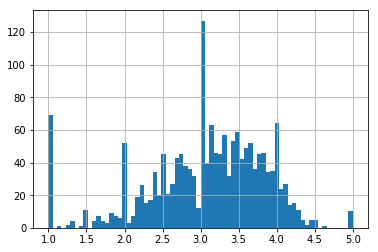

In [37]:
ratings['rating'].hist(bins=70)

## Making a slightly altered dataframe 

In [18]:
movie =df.pivot_table(index='user_id', columns='title', values='rating')

In [19]:
movie.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
ratings.sort_values('num of ratings', ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


## I will use this data to find similar movies to some of my favourites

In [38]:
casablanca_user_ratings = movie['Casablanca (1942)']
schindler_user_ratings = movie['Schindler\'s List (1993)']

In [42]:
casablanca_user_ratings.head()

user_id
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Casablanca (1942), dtype: float64

In [43]:
similar_to_casablanca = movie.corrwith(casablanca_user_ratings)

c:\users\hp\appdata\local\programs\python\python36-32\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\users\hp\appdata\local\programs\python\python36-32\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [44]:
similar_to_schindler = movie.corrwith(schindler_user_ratings)

c:\users\hp\appdata\local\programs\python\python36-32\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\users\hp\appdata\local\programs\python\python36-32\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [45]:
corr_casablanca = pd.DataFrame(similar_to_casablanca, columns=['Correlation'])
corr_casablanca.dropna(inplace=True)

In [46]:
corr_casablanca.head()

,Correlation
title,
'Til There Was You (1997),0.467099
101 Dalmatians (1996),0.138923
12 Angry Men (1957),0.168391
187 (1997),0.170996
2 Days in the Valley (1996),0.453915


In [48]:
corr_casablanca.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
unknown,1.0
Hear My Song (1991),1.0
Switchback (1997),1.0
Selena (1997),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
Mrs. Dalloway (1997),1.0
House Party 3 (1994),1.0
Casablanca (1942),1.0
"Flower of My Secret, The (Flor de mi secreto, La) (1995)",1.0


In [49]:
corr_casablanca = corr_casablanca.join(ratings['num of ratings'])

In [50]:
corr_casablanca.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.467099,9
101 Dalmatians (1996),0.138923,109
12 Angry Men (1957),0.168391,125
187 (1997),0.170996,41
2 Days in the Valley (1996),0.453915,93


In [58]:
corr_casablanca[corr_casablanca['num of ratings']>200].sort_values('Correlation', ascending=False).head()

,Correlation,num of ratings
title,,
Casablanca (1942),1.000000,243
"Wizard of Oz, The (1939)",0.369649,246
Butch Cassidy and the Sundance Kid (1969),0.296761,216
Return of the Jedi (1983),0.291969,507
Dead Poets Society (1989),0.278314,251


## Here I have recommended similar movies to Casablanca

In [52]:
corr_schindler = pd.DataFrame(similar_to_schindler, columns=['Correlation'])

In [54]:
corr_schindler.dropna(inplace=True)

In [55]:
corr_schindler = corr_schindler.join(ratings['num of ratings'])

In [56]:
corr_schindler[corr_schindler['num of ratings']>50].sort_values('Correlation', ascending=False).head(10)

,Correlation,num of ratings
title,,
Schindler's List (1993),1.000000,298
Daylight (1996),0.711991,57
Anastasia (1997),0.664497,66
Desperate Measures (1998),0.653359,72
"Last Supper, The (1995)",0.570074,58
Othello (1995),0.562395,72
Tales from the Crypt Presents: Bordello of Blood (1996),0.541767,55
Kull the Conqueror (1997),0.504308,69
Seven Years in Tibet (1997),0.499259,155


## And here movies recommended for Schindler's list